### Cluster creation

1. CMD or terminal
2. AWS UI

1. Create the the cluster on EKS using below Command 

eksctl create cluster --name test-cluster --version 1.24 --region us-east-1 --zones=us-east-1a,us-east-1b,us-east-1c,us-east-1d --nodegroup-name linux-node --node-type t2.micro --nodes 2

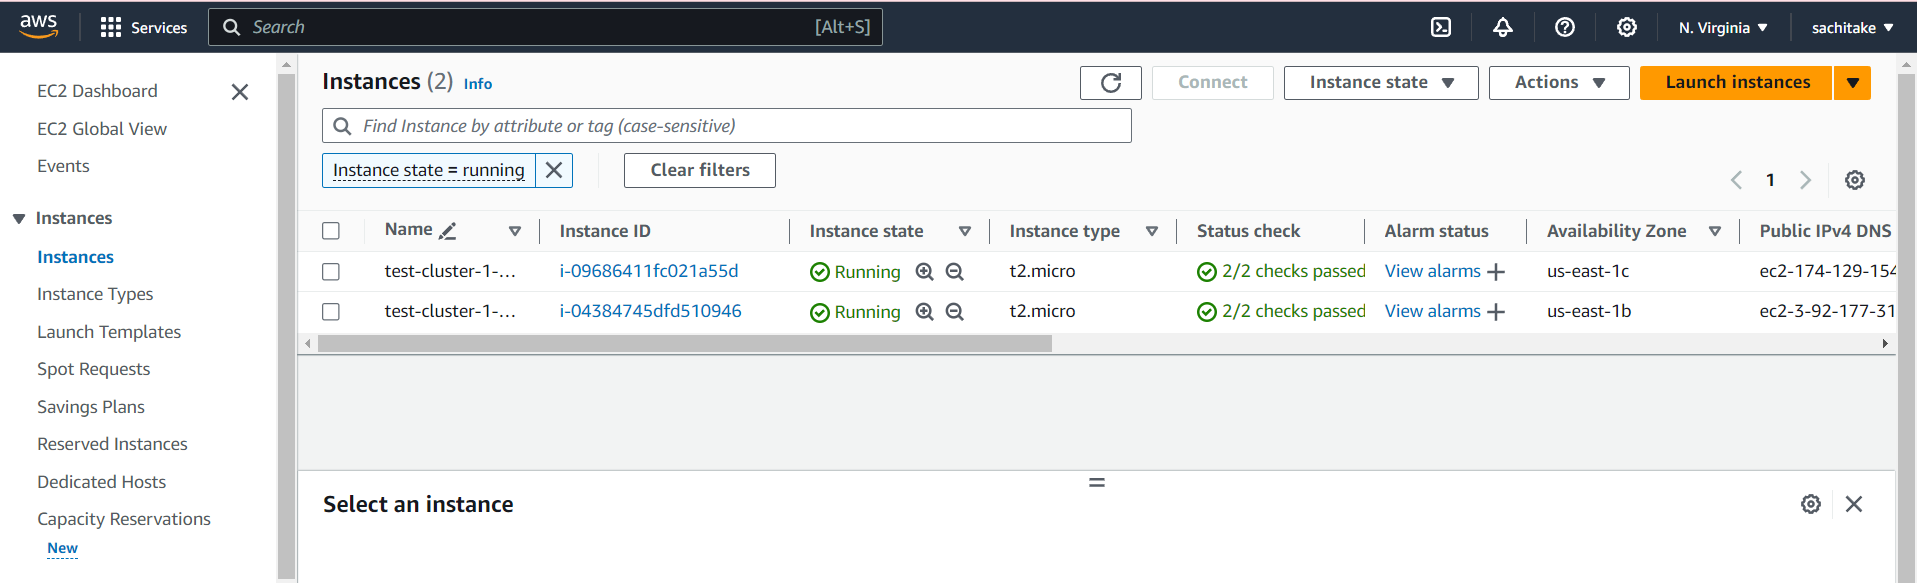

2023-11-25 21:14:17 [✔]  EKS cluster "test-cluster-2" in "us-east-1" region is ready

In [ ]:
Both will have same IP address

2. to deploy on EKS you will require 4 yaml files

       1. deployment.yaml
       2. service_loadbalancer.yaml
       3. service_clusterip.yaml
       4. service_nodeport.yaml

In [ ]:
deployment.yaml

apiVersion: apps/v1
kind: Deployment
metadata:
  name: myapp-insurance
spec:
  selector:
    matchLabels:
      app: myapp-insurance
  template:
    metadata:
      labels:
        app: myapp-insurance
    spec:
      containers:
      - name: myapp-insurance
        image: shrivctc/ins:v1
        resources:
          limits:
            memory: "128Mi"
            cpu: "500m"
        ports:
        - containerPort: 9696

In [ ]:
service_loadbalancer.yaml

apiVersion: v1
kind: Service
metadata:
  name: myapp-insurance-loadbalancer
spec:
  type: LoadBalancer
  selector:
    app: myapp-insurance
  ports:
  - protocol: "TCP"
    port: 80
    targetPort: 9696

In [ ]:
service_clusterip.yaml

apiVersion: v1
kind: Service
metadata:
  name: myapp-insurance-cluster-ip
spec:
  type: ClusterIP
  selector:
    app: myapp-insurance
  ports:
  - protocol: TCP
    port: 80
    targetPort: 9696

In [ ]:
service_nodeport.yaml

apiVersion: v1
kind: Service
metadata:
  name: myapp-insurance-nodeport
spec:
  type: NodePort
  selector:
    app: myapp-insurance
  ports:
  - protocol: TCP
    port: 80
    targetPort: 9696

Now Create the objects in EKS Cluster using below commands 

1. for deployment 
    kubectl apply -f deployment.yaml
2. for loadbalancer 
    kubectl apply -f service.yaml
3. for cluster_ip
    kubectl apply -f clusterip.yaml
4. for nodeport
    kubectl apply -f nodeport.yaml

Note: To get the external for accessing the app 

    kubectl get all 



get the external ip from loadbalancer service:
    
    http://a3a5203e88a3a4ccfb78c359d51cb389-83948601.us-east-1.elb.amazonaws.com:80
    http://a3a5203e88a3a4ccfb78c359d51cb389-83948601.us-east-1.elb.amazonaws.com:<port_no>

if you want to expose the target port use below command 

    kubectl expose deployment <DEPLOYMENT-NAME> --type=LoadBalancer --name=<SERVICE-NAME>

in our case 

    kubectl expose deployment myapp-insurance --type=LoadBalancer --name=myapp-insurance-lb 

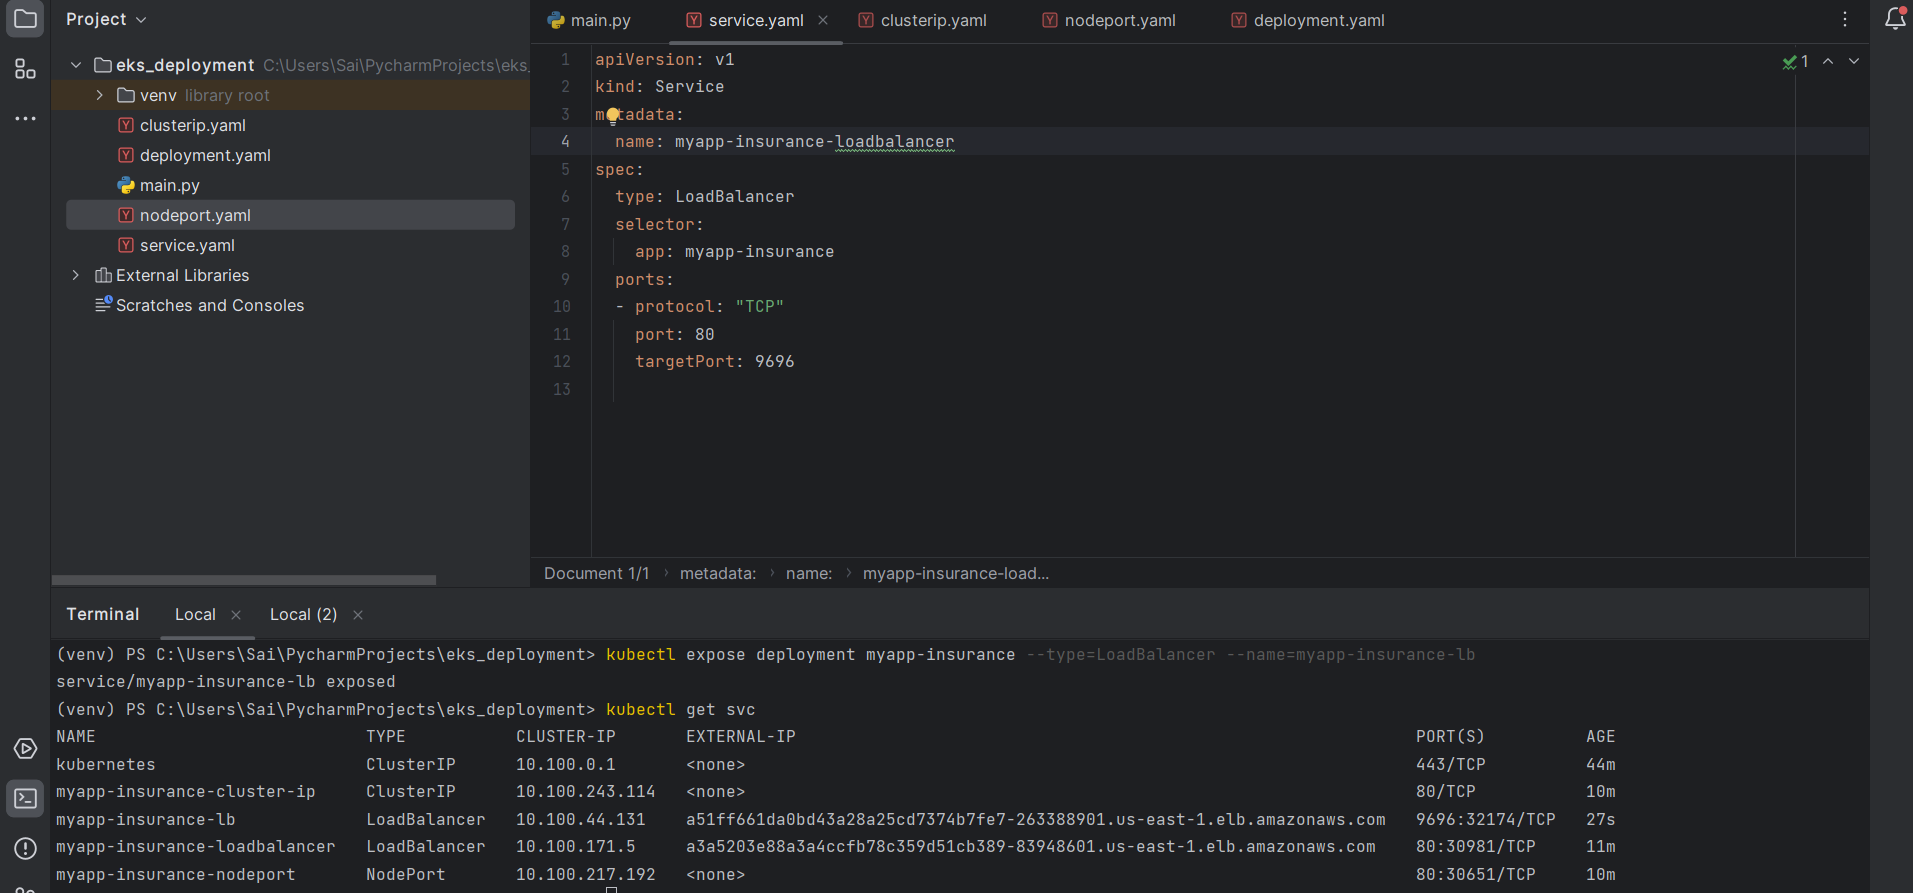

to access:

a51ff661da0bd43a28a25cd7374b7fe7-263388901.us-east-1.elb.amazonaws.com:9696


   8 AWS configure
  11 kubectl get svc --all-namespaces
  12 eksctl create cluster --name test-cluster-1 --version 1.24 --region us-east-1 --zones=us-east-1a,us-east-1b,us-east-1c,us-east-1d --nodegroup-name linux-node --node-type t...
  13 kubectl get all
  14 kubectl apply -f deployment.yaml
  16 kubectl apply -f .\service.yaml
  17 kubectl apply -f .\clusterip.yaml
  18 kubectl apply -f .\nodeport.yaml
  19 kubectl get all
  20 kubectl expose deployment myapp_insurance --type=LoadBalancer --name=myapp-insurance-lb
  21 kubectl expose deployment myapp-insurance --type=LoadBalancer --name=myapp-insurance-lb
  22 kubectl get svc
  23 eksctl delete cluster --name test-cluster-1
